In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Data_Sets\red-wine.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
imput_shape = [11]

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

In [8]:
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.3612558 ],
       [ 0.56321424],
       [-0.1778081 ],
       [-0.04588997],
       [-0.16860259],
       [ 0.49110204],
       [ 0.70262843],
       [-0.17358077],
       [-0.21177948],
       [ 0.5736162 ],
       [ 0.11224377]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


4/4 [==============================] - 0s 6ms/step


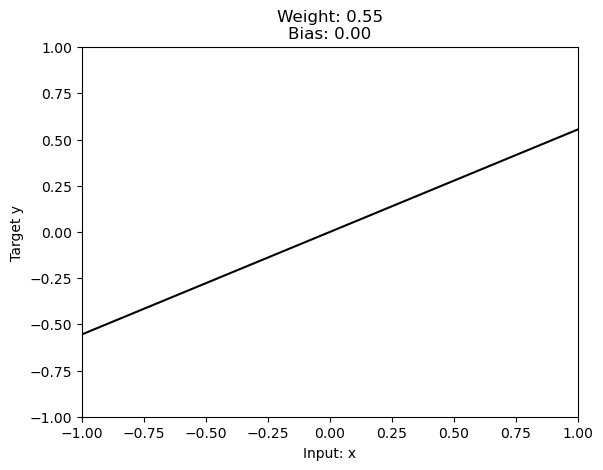

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [11]:
import pandas as pd
from IPython.display import display

# Create training and validation splits
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [12]:
print(X_train.shape)

(1119, 11)


In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [14]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 4s 138ms/step - loss: 0.2726 - val_loss: 0.1402
Epoch 2/10
5/5 [==============================] - 0s 41ms/step - loss: 0.1500 - val_loss: 0.1373
Epoch 3/10
5/5 [==============================] - 0s 42ms/step - loss: 0.1312 - val_loss: 0.1261
Epoch 4/10
5/5 [==============================] - 0s 43ms/step - loss: 0.1187 - val_loss: 0.1235
Epoch 5/10
5/5 [==============================] - 0s 36ms/step - loss: 0.1132 - val_loss: 0.1094
Epoch 6/10
5/5 [==============================] - 0s 37ms/step - loss: 0.1119 - val_loss: 0.1078
Epoch 7/10
5/5 [==============================] - 0s 35ms/step - loss: 0.1075 - val_loss: 0.1064
Epoch 8/10
5/5 [==============================] - 0s 37ms/step - loss: 0.1050 - val_loss: 0.1032
Epoch 9/10
5/5 [==============================] - 0s 42ms/step - loss: 0.1049 - val_loss: 0.1147
Epoch 10/10
5/5 [==============================] - 0s 42ms/step - loss: 0.1044 - val_loss: 0.1033


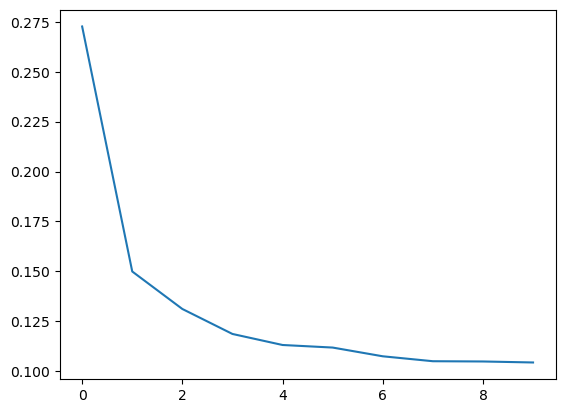

In [18]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();